In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.measurement import plot_basic

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-18_124841_sweep_stream_on_off/')

In [4]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [5]:
num_channels = 7
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = [sss for sss in all_sss if sss.state.lo_index == channel]

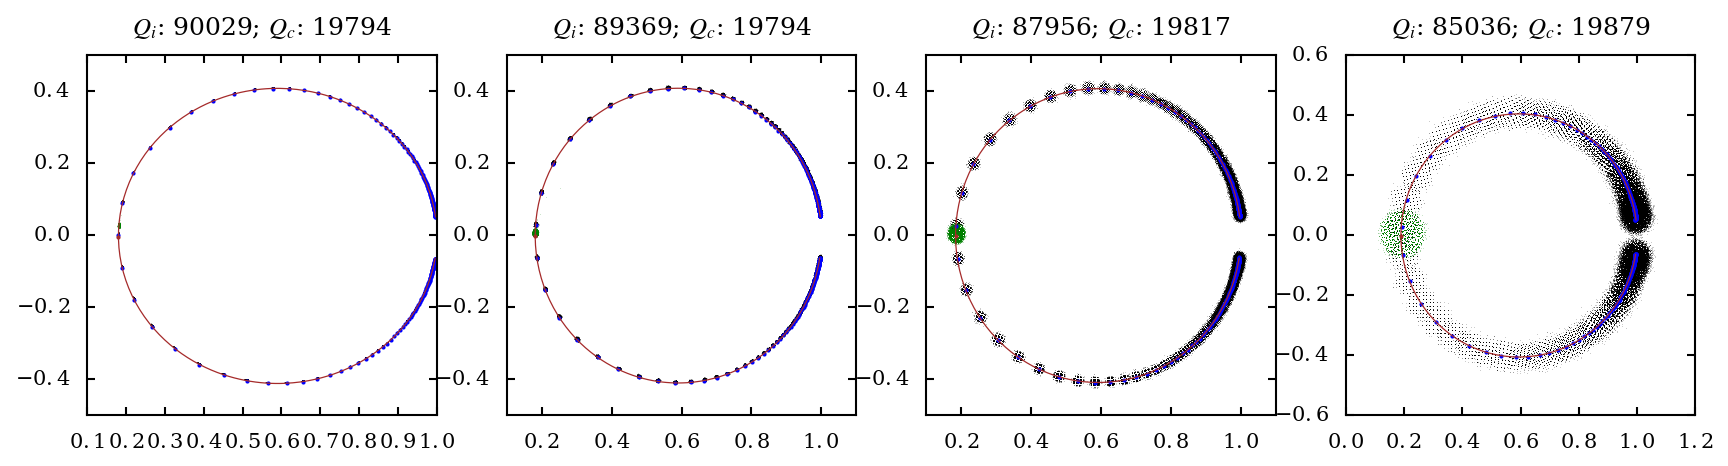

In [6]:
channel = 0
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

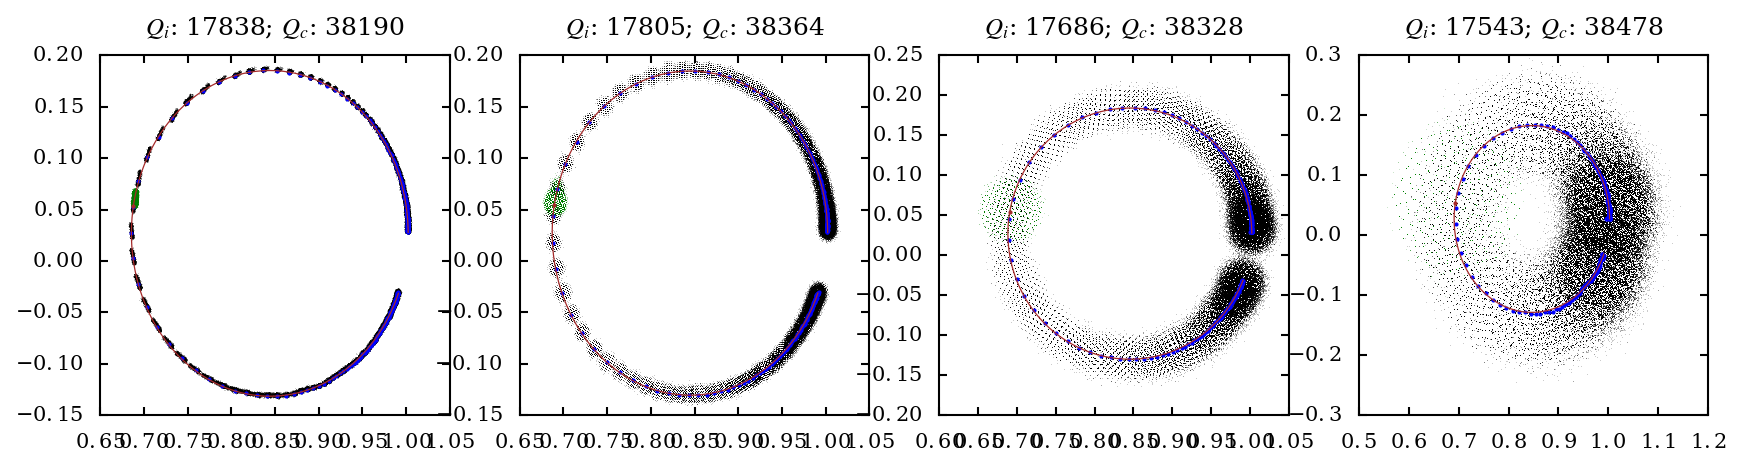

In [7]:
channel = 1
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

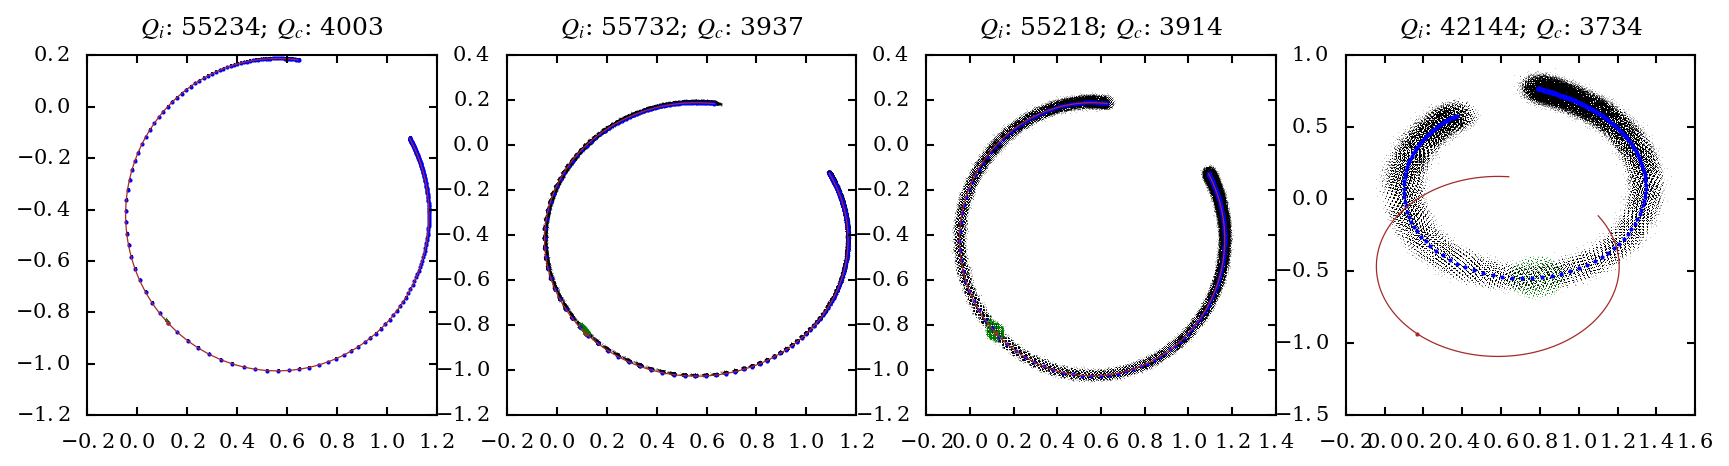

In [8]:
channel = 2
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

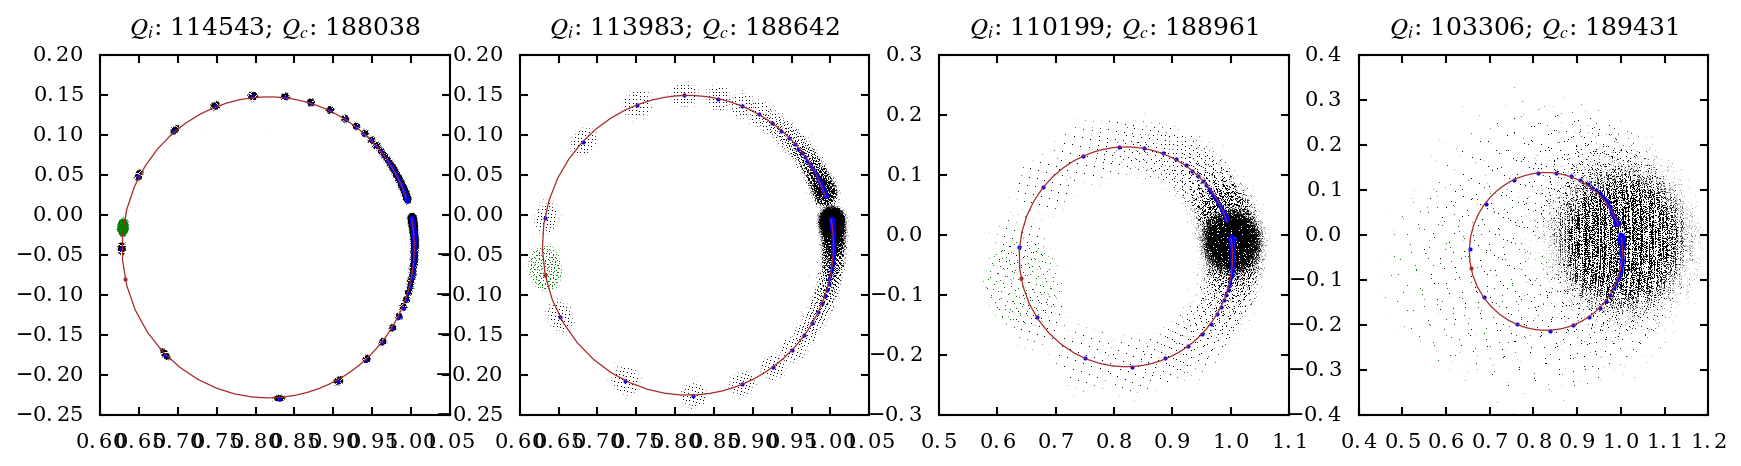

In [9]:
channel = 3
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

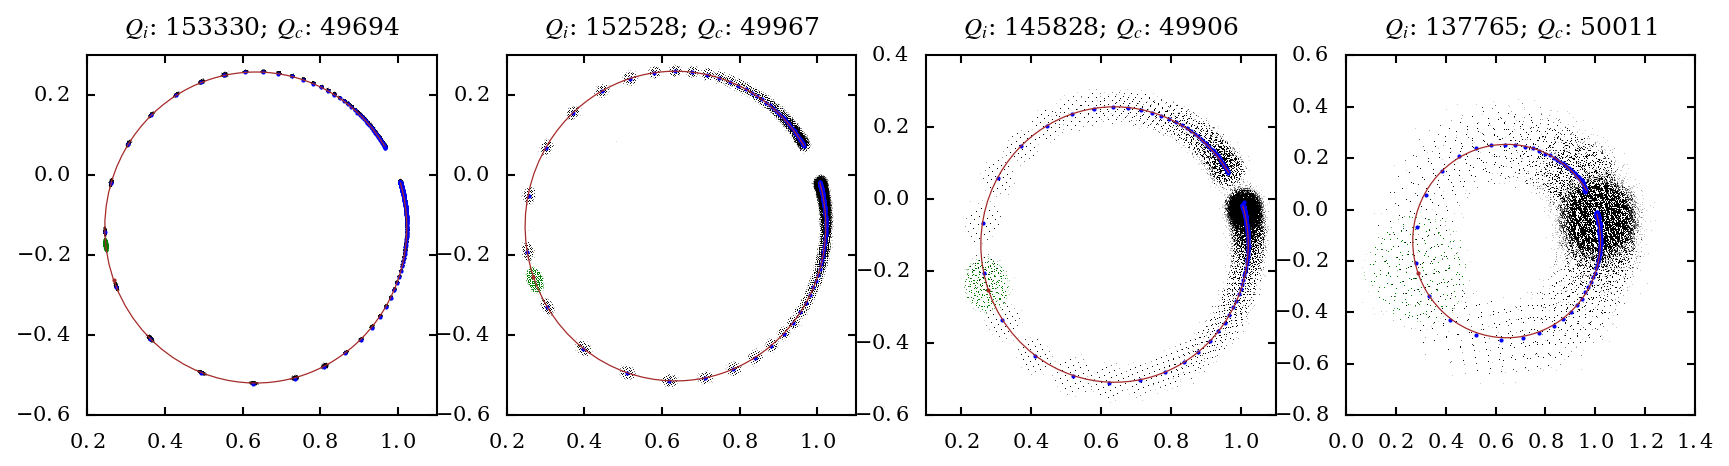

In [10]:
channel = 4
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

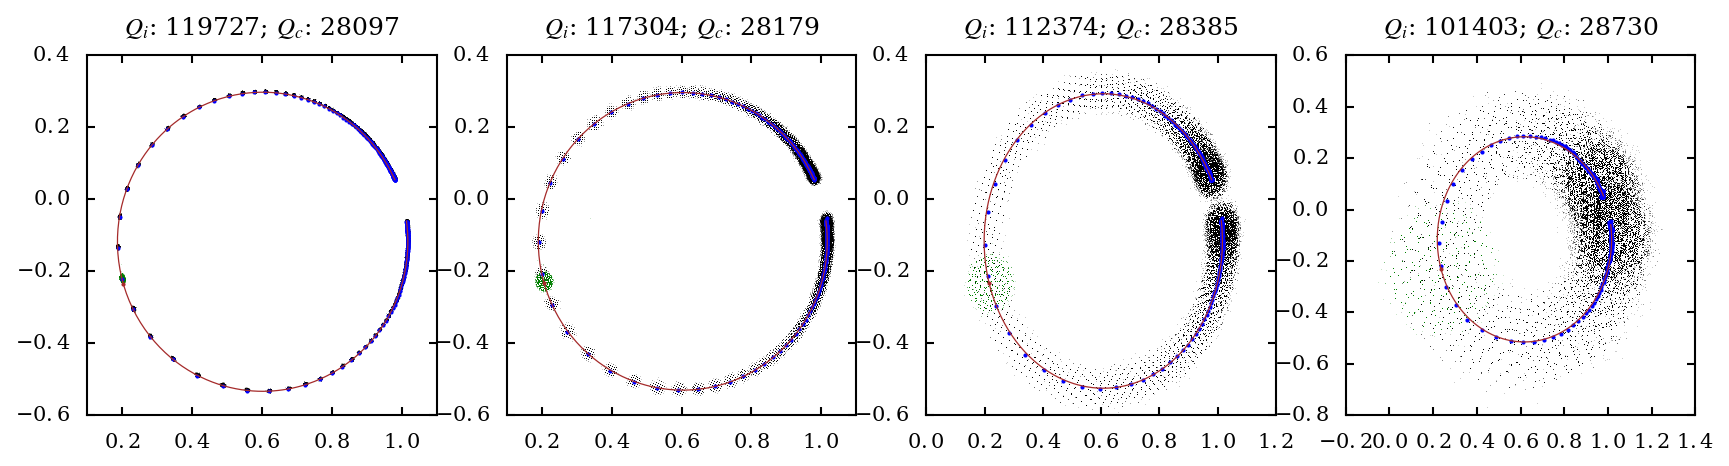

In [11]:
channel = 5
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

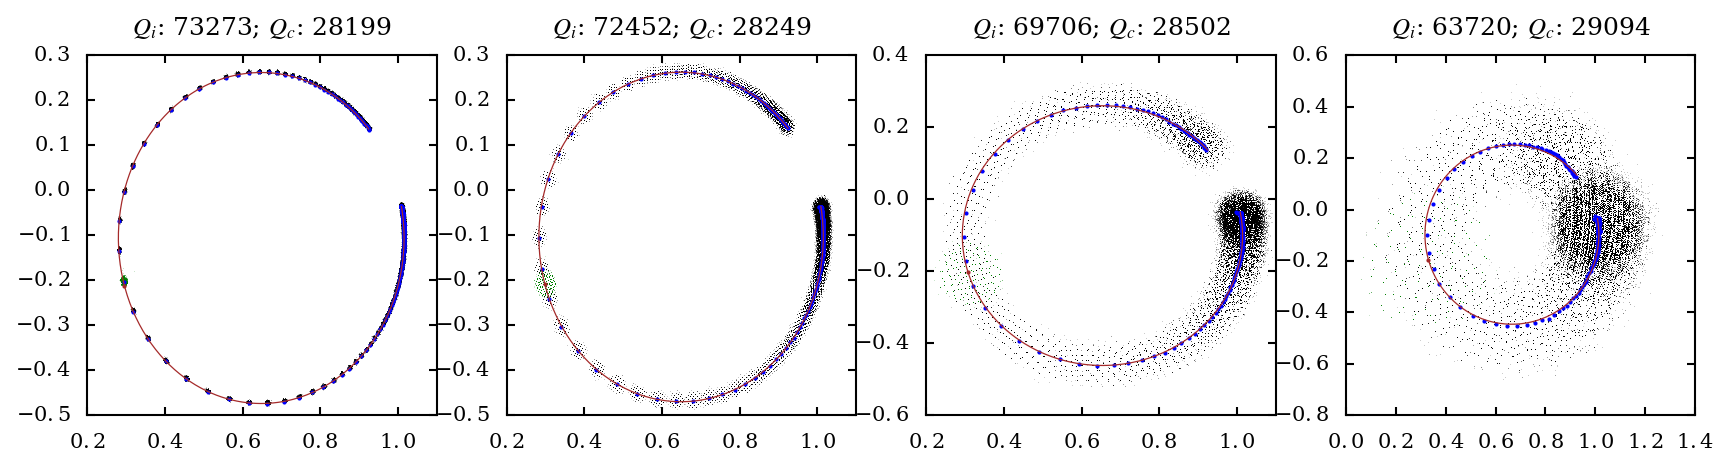

In [12]:
channel = 6
fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

In [13]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

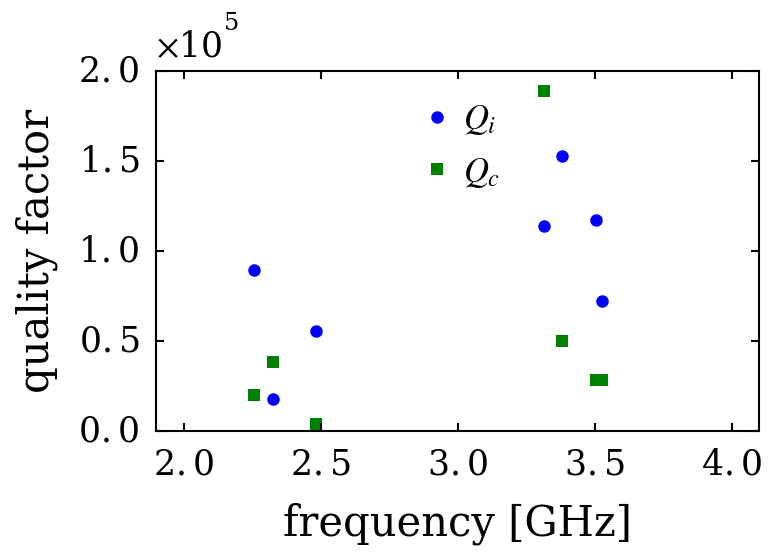

In [14]:
attenuation_index = 1
fig, ax = plt.subplots()
sssl = [sss_list[attenuation_index] for sss_list in sss_dict.values()]
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_i for sss in sssl],
        'o', color=Qi_color, label='$Q_i$')
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_e_real for sss in sssl],
        's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
ax.legend(loc='upper center', numpoints=1)
ax.set_xlim(1.9, 4.1);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_and_Qc_vs_fr.pdf')

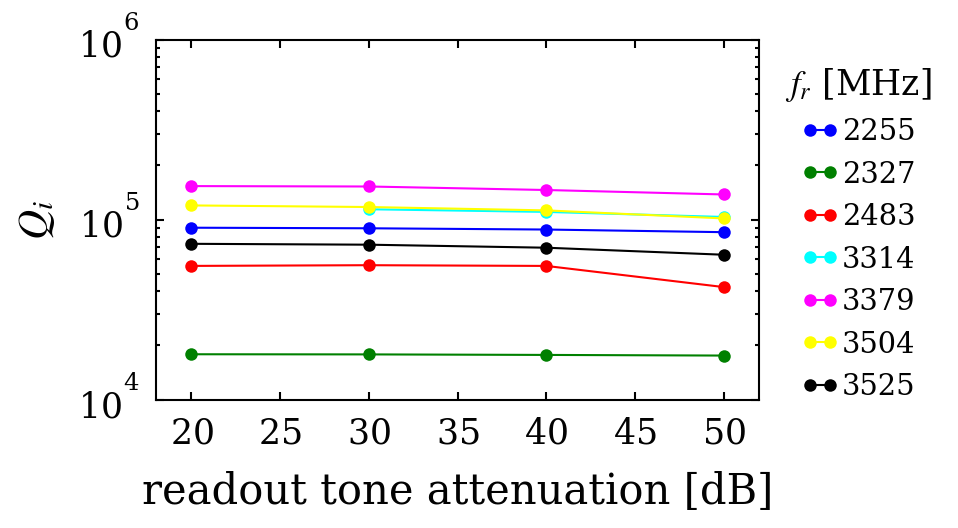

In [15]:
first_good_attenuations = 3 * [0] + [1] + 3 * [0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray']

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylabel('$Q_i$')
ax.set_xlabel('readout tone attenuation [dB]')

for channel in range(num_channels):
    sssl = sss_dict[channel][first_good_attenuations[channel]:]
    ax.plot([sss.stream.roach_state.dac_attenuation for sss in sssl],
             [sss.resonator.Q_i for sss in sssl],
            '-', marker='o', color=colors[channel], label='{:.0f}'.format(1e-6 * sssl[-1].resonator.f_0))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')
ax.set_xlim(18, 52);

#fig.savefig('/home/flanigan/temp/Qi_vs_atten.pdf', bbox_inches='tight')

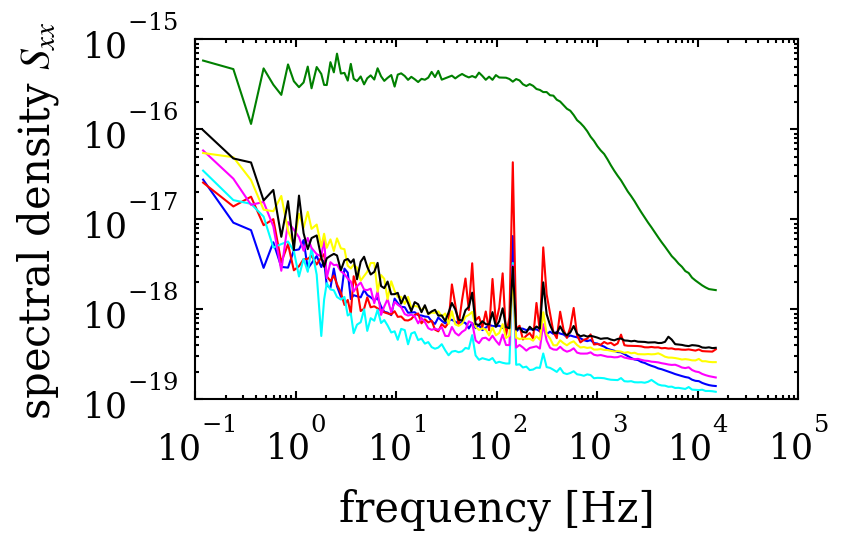

In [16]:
attenuation_index = 0

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S_{xx}$')

for channel, sssl in sss_dict.items():
    sss = sssl[attenuation_index]
    sss.set_S(binned=True)
    ax.plot(sss.S_frequency, sss.S_xx, color=colors[channel])

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_all_Sxx_vs_frequency_at_30dB.pdf', bbox_inches='tight')

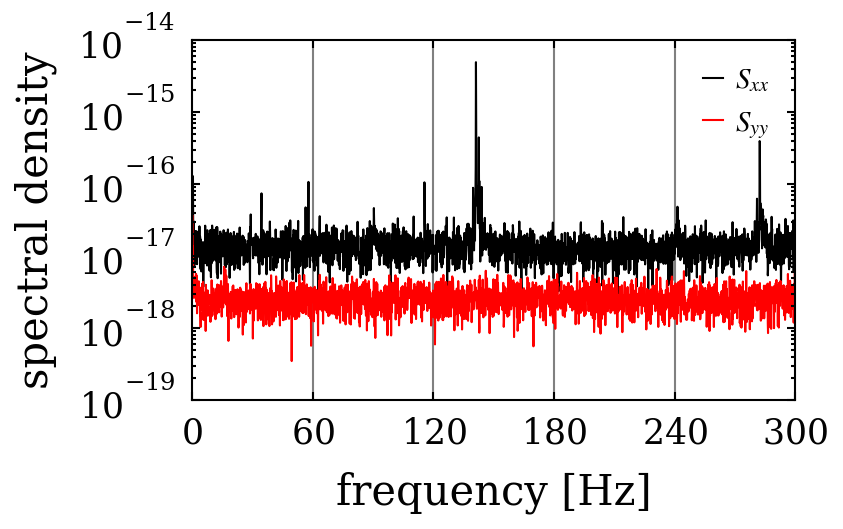

In [17]:
attenuation_index = 1
channel = 2
sss = sss_dict[channel][attenuation_index]
sss.set_S(binned=False)
fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density')
ax.set_yscale('log')
ax.set_xticks([0, 60, 120, 180, 240, 300])

for f in [60, 120, 180, 240]:
    ax.axvline(f, color='gray')
ax.plot(sss.S_frequency, sss.S_xx, color='k', label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, color='r', label='$S_{yy}$')
ax.legend(loc='upper right', ncol=1, fontsize='xx-small')

ax.set_xlim(0, 300);
#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_channel_0_Sxx_Syy_vs_frequency.pdf', bbox_inches='tight')